In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Data Cleaning

In [5]:
df.drop_duplicates(inplace=True)

# Print all types of key values in a column
print(df['Medal'].unique())
print(df['Sex'].unique())
# print(df['NOC'].unique())

df['Medal'] = df['Medal'].fillna('No Medal')
df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'})
df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Height'] = df.groupby(['Sex', 'Sport'])['Height']\
                 .transform(lambda x: x.fillna(x.mean()))

df['Weight'] = df.groupby(['Sex', 'Sport'])['Weight']\
                 .transform(lambda x: x.fillna(x.mean()))

df.head()
df.isnull().sum()

[nan 'Gold' 'Bronze' 'Silver']
['M' 'F']


ID          0
Name        0
Sex         0
Age         0
Height    100
Weight    451
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [6]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,Male,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,Male,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,Male,24.0,177.480339,73.086644,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,Male,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,Female,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


Medal Trend by Country & Year

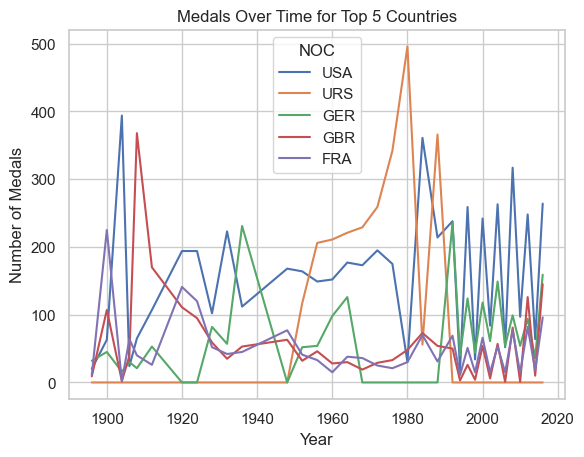

In [10]:
# make new df with only medalists
medals_df = df[df['Medal'] != 'No Medal']

# group by year and noc
country_year_medals = medals_df.groupby(['Year', 'NOC'])['Medal'].count().reset_index()

# pivot for heat map plot
country_year_pivot = country_year_medals.pivot(index='Year', columns='NOC', values='Medal').fillna(0)

# Plot medal trend for top 5 countries by total medals
top_countries = medals_df['NOC'].value_counts().head(5).index
country_year_pivot[top_countries].plot()
plt.title('Medals Over Time for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()

Gender Ratio Trends Over Decades

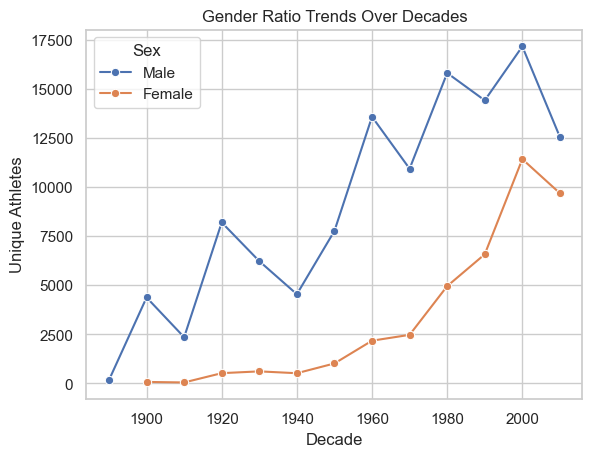

In [11]:
# adding decade column
df['Decade'] = (df['Year'] // 10) * 10

# counting male vs female athletes per decade
gender_decade = df.groupby(['Decade', 'Sex'])['ID'].nunique().reset_index()

# rename for clarity
gender_decade.columns = ['Decade', 'Sex', 'Unique Athletes']

sns.lineplot(data=gender_decade, x='Decade', y='Unique Athletes', hue='Sex', marker='o')
plt.title('Gender Ratio Trends Over Decades')
plt.show()

Which Sports Give Most Medals to Each Country

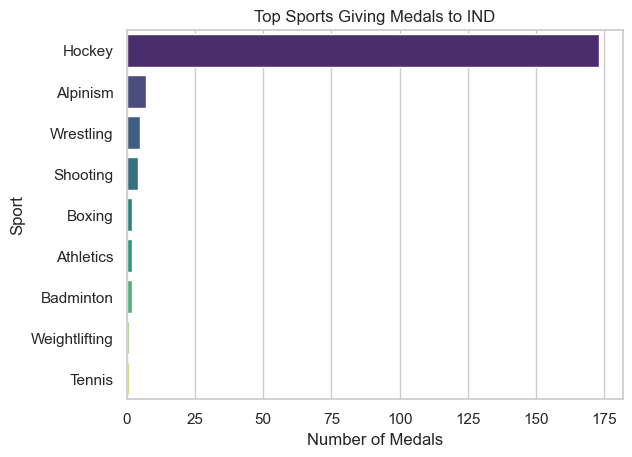

In [16]:
# ilter only medalists
medals_df = df[df['Medal'] != 'No Medal']

# Example: USA
country = 'IND'

# Top sports for this country
top_sports = medals_df[medals_df['NOC'] == country]['Sport'].value_counts().head(10)

# Plot
sns.barplot(y=top_sports.index, x=top_sports.values, hue=top_sports.index, palette='viridis', legend=False)
plt.title(f'Top Sports Giving Medals to {country}')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.show()


In [17]:
# Save cleaned data for Tableau or further use
df.to_csv('olympics_cleaned.csv', index=False)
